### Python libraries
Please activate the Conda environment you created in the terminal command line, and then execute the following commands line by line:
```
conda activate pt12
pip install transformers
pip install openpyxl
```

## Exercise 3: Enzyme-Substrate Activity Parameter Prediction (Lab Exercise)

### Overview
This exercise delves into the application of AI techniques for predicting enzyme activity parameters, focusing on the use of pre-trained models and comprehensive model evaluation.

### Objectives
- Understand and apply the fundamental principles and methods of using AI technology for enzyme engineering, including the use of machine learning and deep learning models to guide enzyme design and optimization.

## 3.1 Overview of Activity Parameters

### Definition and Importance of Enzyme Activity Parameters
- **Definition**: Enzyme activity parameters are a series of metrics that measure the catalytic efficiency of enzymes, including but not limited to turnover number (kcat), Michaelis constant (Km), and maximum reaction rate (Vmax).
- **Importance**:
  - **Optimizing Enzyme Performance**: Understanding enzyme activity parameters allows for the optimization of catalytic efficiency, enhancing the value of enzymes in industrial and biotechnological applications.
  - **Enzyme Engineering**: Activity parameters serve as crucial references in enzyme engineering, aiding in the design and selection of efficient enzyme variants.
  - **Drug Development**: In drug development, enzyme activity parameters are key indicators for evaluating drug targets and candidate drug efficacy.

### 3.2 Data Collection and Preprocessing
- **Data Sources**:
  - **Public Databases**: Such as BRENDA, KEGG, PDB, etc.
  - **Experimental Data**: Data generated in the laboratory.

   `Question 1`: Could you go to BRENDA website and search for the kcat value for 1-butanol of *Geobacillus stearothermophilus* alcohol dehydrogenase? Hint: the EC number for alcohol dehydrogenase is 1.1.1.1

  ______________________________________________________

- **Data Collection**:
  - **Literature Review**: Gather enzyme activity parameter data by reviewing relevant literature.
  - **Database Queries**: Download relevant data from public databases.
- **Data Preprocessing**:
  - **Data Cleaning**: Remove duplicates, handle missing values, and detect outliers.
  - **Data Standardization**: Convert data into a uniform format and units.
  - **Feature Engineering**: Extract useful features, such as enzyme amino acid sequences and substrate SMILES strings.

## 3.3 Application of Deep Learning in Activity Parameter Prediction
- **Deep Learning Models**:
  - **Pre-trained Models**:
    - **ESM (Evolutionary Scale Modeling)**: A pre-trained model for generating embeddings from enzyme amino acid sequences.
    - **SMILES Transformer**: A pre-trained model for generating embeddings from substrate SMILES strings.
  - **Neural Networks**: Such as Multi-Layer Perceptron (MLP), Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN), etc.
- **Application Examples**:
  - **Enzyme Activity Prediction**: Use deep learning models to predict the maximum reaction rate (Vmax) and Michaelis constant (Km) of enzymes.
  - **Substrate Specificity Prediction**: Predict the specificity of enzymes towards different substrates.

## 3.4 Building a Machine Learning and a Deep Learning Model for Activity Parameter Prediction

### Model Training
- **Data Preparation**:
  - **Training Set**: Data used to train the model.
  - **Validation Set**: Data used to tune hyperparameters and evaluate model performance.
  - **Test Set**: Data used for the final evaluation of model performance.
- **Model Architecture**:
  - **Input Layer**: Accepts the amino acid sequence of the enzyme and the SMILES string of the substrate.
  - **Embedding Layer**:
    - **ESM Embedding**: Generates embeddings from enzyme amino acid sequences using the ESM pre-trained model.
    - **SMILES Transformer Embedding**: Generates embeddings from substrate SMILES strings using the SMILES Transformer pre-trained model.
  - **Hidden Layers**: Multiple neural network layers for learning complex feature representations.
  - **Output Layer**: Predicts the enzyme's activity parameters.
- **Loss Function**:
  - **Mean Squared Error (MSE)**: Used for regression tasks.

### Model Evaluation
- **Evaluation Metrics**:
  - **Pearson Correlation Coefficient (PCC)**: Measures the linear relationship between predicted and actual values.
  - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
  - **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values.
  - **Coefficient of Determination (R²)**: Measures the goodness of fit of the model.
- **Cross-Validation**:
  - **K-Fold Cross-Validation**: Split the dataset into K subsets, train the model on K-1 subsets, and validate on the remaining subset.

### Model Optimization Strategies
- **Hyperparameter Tuning**:
  - **Grid Search**: Try all possible combinations of hyperparameters.
  - **Random Search**: Randomly select hyperparameter combinations for evaluation.
  - **Bayesian Optimization**: Optimize hyperparameters based on Bayesian statistical methods.
- **Regularization**:
  - **L1 Regularization**: Adds an absolute value penalty term, promoting sparsity in the model.
  - **L2 Regularization**: Adds a squared value penalty term, helping to prevent overfitting.
- **Early Stopping**:
  - **Early Stopping**: Terminate training early when the validation performance no longer improves.

In [ ]:
# Load necessary python package
import numpy as np
import pandas as pd
import pickle
import math
import json
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor

### Pretrained Models: ESM & SMILES TRANSFORMER

#### ESM (If you forgot this part, please remove the first # at the start of each line(`Select all and Ctrl+/`), and run the code below)

In [2]:
# import torch
# import esm
# # ESM accepts the protein sequence as input, generates an embedding vector for each position and outputs it.
# def esm_method(sequence):
#     # Determine the device to use (GPU if available, otherwise CPU)
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#     # Load the pre-trained ESM model and its alphabet
#     model, alphabet = esm.pretrained.load_model_and_alphabet('/data/home/jiahao/class2/esm2_t33_650M_UR50D.pt')
#     model = model.to(device)  # Move the model to the specified device
#     model.eval()  # Set the model to evaluation mode

#     # Encode the input sequence into token IDs
#     token_ids = torch.tensor([alphabet.encode(sequence)], device=device)

#     # Forward pass through the model without gradient calculation
#     with torch.no_grad():
#         results = model(token_ids, repr_layers=[33])  # Get the output of the last layer (layer 33)
#         token_embeddings = results["representations"][33]  # Extract the token embeddings from the results

#     # Calculate the mean embedding for the entire sequence (optional)
#     # token_embeddings = token_embeddings.mean(dim=1)
    
#     return token_embeddings

# # Example usage
# protein_sequence = "MKWVTFISLLFLFSSAYSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"
# protein_emb_esm = esm_method(protein_sequence)

# # Print the shape and the encoded representations
# print("Encoded representations shape:", protein_emb_esm.shape)
# print("Encoded representations:", protein_emb_esm)

#### SMILES TRANSFORMER for creating embeddings of substrates

In [3]:
# Import necessary libraries
import torch
from utils import split  # Import the split function from the utils module
from build_vocab import WordVocab  # Import the WordVocab class from the build_vocab module
from pretrain_trfm import TrfmSeq2seq  # Import the TrfmSeq2seq class from the pretrain_trfm module

def smiles_to_vec(Smiles):
    """
    Convert a list of SMILES strings to their corresponding vector representations using a pre-trained transformer model.
    
    Args:
    - Smiles (list of str): List of SMILES strings to be converted to vectors.
    
    Returns:
    - X (torch.Tensor): Tensor containing the vector representations of the SMILES strings.
    """
    # Define special token indices
    pad_index = 0  # Padding token index. When dealing with variable-length sequences, shorter sequences are filled to a specified maximum length in order that all sequences have the same length for batch processing. The fill mark here is used to occupy the space.
    unk_index = 1  # Unknown token index. This index is used instead when a tag that does not exist in the vocabulary is encountered.
    eos_index = 2  # End-of-sequence token index
    sos_index = 3  # Start-of-sequence token index
    mask_index = 4  # Mask token index

    # Load the vocabulary
    # Here, a predefined vocabulary is loaded from a pickle file. This vocabulary contains all the tags that may appear in the SMILES string and their corresponding indexes. The vocabulary is loaded so that each character in SMILES can later be converted to its index value in the vocabulary.
    vocab = WordVocab.load_vocab('vocab.pkl')

    def get_inputs(sm):
        """
        Convert a single SMILES string to its input representation (ids and segment ids).
        
        Args:
        - sm (str): A SMILES string.
        
        Returns:
        - ids (list of int): List of token indices.
        - seg (list of int): List of segment indices.
        """
        seq_len = 220  # Maximum sequence length
        sm = sm.split()  # Split the SMILES string into tokens

        if len(sm) > 218:
            # If the SMILES string is too long, truncate it
            # print('SMILES is too long ({:d})'.format(len(sm)))
            sm = sm[:109] + sm[-109:]  # Truncate the middle part
        # Convert tokens to indices, using the unknown token index for out-of-vocabulary tokens
        ids = [vocab.stoi.get(token, unk_index) for token in sm]
        # Add start-of-sequence and end-of-sequence tokens
        ids = [sos_index] + ids + [eos_index]
        # Create segment indices (all 1s for this task)
        seg = [1] * len(ids)
        # Pad the sequences to the maximum sequence length
        padding = [pad_index] * (seq_len - len(ids))
        ids.extend(padding)  # Extend the ids with padding
        seg.extend(padding)  # Extend the segment ids with padding
        return ids, seg

    def get_array(smiles):
        """
        Convert a list of SMILES strings to their input representations (ids and segment ids).
        
        Args:
        - smiles (list of str): List of SMILES strings.
        
        Returns:
        - x_id (torch.Tensor): Tensor of token indices.
        - x_seg (torch.Tensor): Tensor of segment indices.
        """
        x_id, x_seg = [], []  # Initialize lists for ids and segment ids
        for sm in smiles:
            a, b = get_inputs(sm)  # Get ids and segment ids for each SMILES string
            x_id.append(a)  # Append ids to the list
            x_seg.append(b)  # Append segment ids to the list
        # Convert lists to tensors
        return torch.tensor(x_id), torch.tensor(x_seg)

    # Initialize the pre-trained transformer model
    trfm = TrfmSeq2seq(len(vocab), 256, len(vocab), 4)
    # Load the pre-trained model weights
    trfm.load_state_dict(torch.load('trfm_12_23000.pkl'))
    # Set the model to evaluation mode
    trfm.eval()

    # Split the SMILES strings into tokens
    x_split = [split(sm) for sm in Smiles]
    # Get the input representations (ids and segment ids)
    xid, xseg = get_array(x_split)
    # Encode the SMILES strings using the transformer model
    X = trfm.encode(torch.t(xid))  # Transpose the input tensor for the model
    return X

# Example usage 
smiles_list = ['CCO', 'CCN', 'CC1=CC=CC=C1']  # List of SMILES strings
smiles_emb = smiles_to_vec(smiles_list)  # Convert SMILES to vector representations
print('Embeddings of 3 example SMILES are:\n', smiles_emb)  # Print the resulting embeddings

/home/wuke/anaconda3/envs/kejian/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Embeddings of 3 example SMILES are:
 [[ 0.00523071 -0.08264276  0.37686658 ...  1.0763633   0.436734
   0.85975695]
 [-0.09227677 -0.28203857  0.31100205 ...  1.3437254   0.41435784
   0.7400298 ]
 [-0.0044588  -0.00839514  0.3315979  ...  1.990263    0.52604437
   0.32975096]]


### Question：
2. In the code above, we set the maximum SMILES length (220) and truncate the SMILES if the SMILES exceeds the manimum length. 
The reasons for that is ____? Could you search on the ChatGPT or Google/Bing to get the answer?
_________________________________________________________________________________________________________________________________

3. Could you generate the protein and substrate embeddings for Geobacillus stearothermophilus alcohol dehydrogenase interacting with 1-butanol? Hint: First, obtain the protein sequence and the substrate's SMILES representation, then use the appropriate code to convert them into embeddings.

In [4]:
# Type your code here

### Data Input and Preprocess

In [5]:
kinetic_parameter = 'KCAT'
df = pd.read_json(f'./data_{kinetic_parameter}.json')
df.head() # take a look at the header data

,ECNumber,Organism,Smiles,Substrate,Sequence,Type,Source,Value,Test
0,4.2.1.11,Leuconostoc mesenteroides,O=C(O)C(CO)OP(=O)(O)O,2-Phospho-D-glycerate,MSLITDIIAREVLDSRGNPTLEAEVITELGGFGRGMVPSGASTGEH...,wild,dlkcat,27.530000,0
1,1.1.1.41,Streptococcus suis,NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)(O)OCC...,NAD+,MAEKILMREGRLIVPDCPVIPYIEGDGIGRDIWSVSQKVIDAAVKK...,wild,dlkcat,41.000000,0
2,6.3.2.4,Enterococcus faecalis,CCCC(O)C(=O)[O-],D-2-Hydroxyvalerate,MNKIKVAIIFGGCSEEHDVSVKSAIEIAANINTEKFDPHYIGITKN...,wild,dlkcat,0.416667,0
3,2.7.1.21,Thermotoga maritima,Cc1cn([C@H]2CC[C@@H](CO)O2)c(=O)[nH]c1=O,"2',3'-dideoxythymidine",MSGKLTVITGPMYSGKTTELLSFVEIYKLGKKKVAVFKPKIDSRYH...,wild,custom,0.330000,0
4,1.1.1.237,Arabidopsis thaliana,O=C(O)C(=O)Cc1ccccc1,phenylpyruvate,MAESSEPPVVLLHRPPSLTFMDEILTREFRTLITDTSSSESLPSFF...,wild,custom,0.610000,0


In [6]:
df.tail() # take a look at the tail data

,ECNumber,Organism,Smiles,Substrate,Sequence,Type,Source,Value,Test
13439,1.9.6.1,Cereibacter sphaeroides f. sp. denitrificans,O=[N+]([O-])O,nitrate,MTLTRRDLIKAQAAATAAAAAGLPVSALAQPVTGGAEALRIRWSKA...,wild,custom,61.00,1
13440,1.5.3.13,Mus musculus,NCCCNCCCCNCCCN,spermine,MAFPGPRVLVVGSGIAGLGAAQKLCSHRAAPHLRVLEATASAGGRI...,mutant,custom,8.70,1
13441,4.3.1.19,Mycolicibacterium smegmatis,C[C@H](O)[C@H](N)C(=O)O,L-allo-threonine,MTTELSADSRITALTAPLSAADIDEAARRISGVVTESPLQYCERLS...,wild,custom,5.69,1
13442,3.4.22.41,Homo sapiens,Cc1cc(=O)oc2cc(NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C...,N-benzyloxycarbonyl-L-Arg-L-Arg-4-methylcoumar...,MAPWLQLLSLLGLLPGAVAAPAQPRAASFQAWGPPSPELLAPTRFA...,wild,custom,0.20,1
13443,5.2.1.1,Alcaligenes faecalis,O=C([O-])C=CC(=O)[O-],Fumarate,MKTYRIGQIVPSSNTTMETEIPAMLQARYAEFPEERFTFHSSRMRM...,wild,dlkcat,36.70,1


Extract data from the dataset and log-transform it

In [7]:
# Extract data from the dataset
Sequence = df['Sequence']
Smiles = df['Smiles']
Label_src = df['Value'].astype(float)# change the data type of the 'Value' column to float
ECNumber = df['ECNumber']
Organism = df['Organism']
Substrate = df['Substrate']
type_ = df['Type']
Test = df['Test']
Label = [math.log(x, 10) if x != 0 else -10000000000 for x in Label_src]
# Log-transform the labels, setting zero values to a very small number

### Question:
4. Take a look at the figures below, and think about why do we log-transform the data value? 
____________________________________________________________________________________

plot the orginal kcat data distribtuion and log-transformed data distribtuion

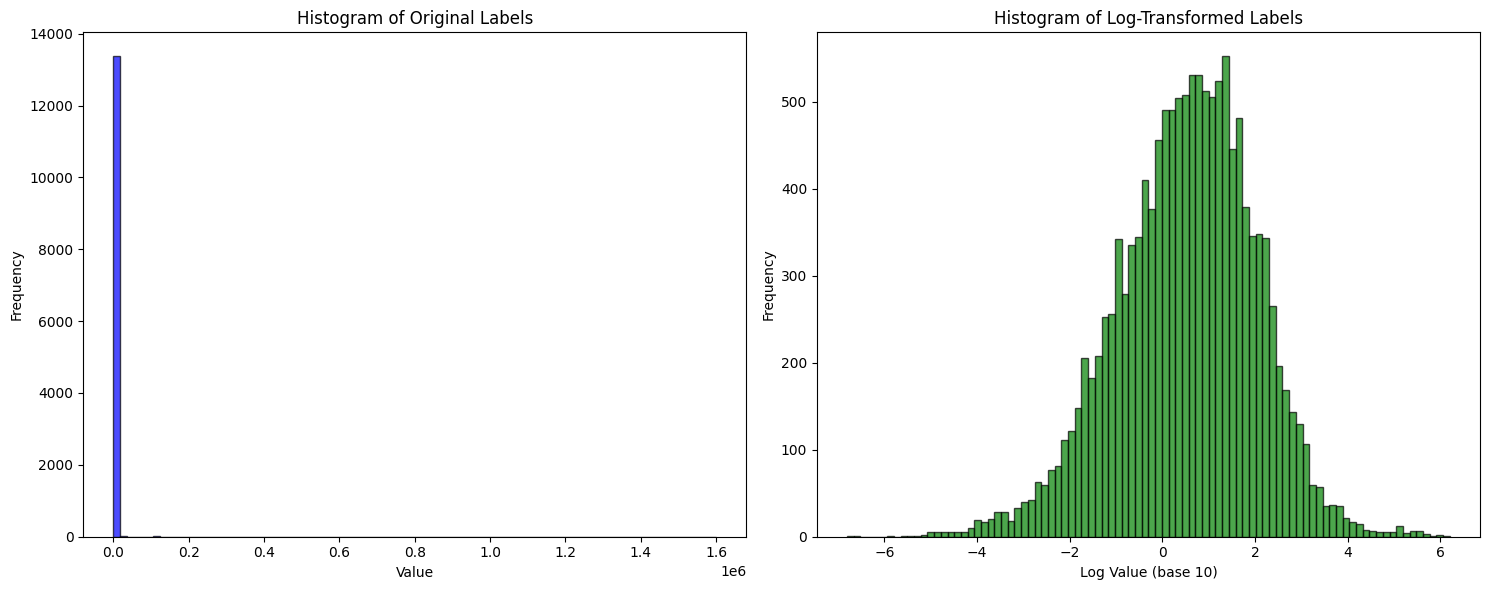

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))

# plot the histogram of the original labels
plt.subplot(1, 2, 1)
plt.hist(Label_src, bins=90, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Original Labels')
plt.xlabel('Value')
plt.ylabel('Frequency')

# plot the histogram of the log-transformed labels
plt.subplot(1, 2, 2)
plt.hist(Label, bins=90, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Log-Transformed Labels')
plt.xlabel('Log Value (base 10)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Here we load input from pre-generated embeddings (to save time and computing power), and preprocess the embedding data set (combine the embeeding of substrate and protein,respectively).

In [ ]:
# Define model and parameter names 
smi_model = 'smitrans'
seq_model = 'esm2'
model_name = 'UniKP'
# Function to load input data from a file
def load_input_from_file(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)
'''
In order to save computing power, the embedding of protein sequences and molecular SMILES has been pre-generated
'''
file_path = '/data/home/jiahao/class3'
# Load the pre-computed feature inputs
smiles_input = load_input_from_file(f'{file_path}/{smi_model}_{kinetic_parameter}.pkl')
sequence_input = load_input_from_file(f'{file_path}/{seq_model}_{kinetic_parameter}.pkl')

# Concatenate the features
feature = np.concatenate((smiles_input, sequence_input), axis=1)
Label = np.array(Label)

# Filter and prepare the dataset
feature_new = []
Label_new = []
sequence_new = []
Smiles_new = []
ECNumber_new = []
Organism_new = []
Substrate_new = []
Type_new = []
Test_new = []

for i in range(len(Label)):
    if -10000000000 < Label[i] and '.' not in Smiles[i]:
        feature_new.append(feature[i])
        Label_new.append(Label[i])
        sequence_new.append(Sequence[i])
        Smiles_new.append(Smiles[i])
        ECNumber_new.append(ECNumber[i])
        Organism_new.append(Organism[i])
        Substrate_new.append(Substrate[i])
        Type_new.append(type_[i])
        Test_new.append(Test[i])

# Print some statistics about the preprocessed dataset 
print(f'length of preprocessed kcat data is {len(Label_new)}, minimum kcat value in this dataset is {min(Label_new)} in log10 scale, maximum label in data is {max(Label_new)} in log10 scale')

# Convert the filtered lists to numpy arrays; 
# The label_new contains the corresponding log-transformed kcat value for corresponding enzyme and substrate, while feature_new contains the concatated substrate and protein embedding, while 
Label_new = np.array(Label_new)
feature_new = np.array(feature_new)

length of data is 13142, minimum label of data is -6.5376020021010435, maximum label in data is 6.204119982655924


### Machine Learning Method
In this part, we trained a machine learning model for kcat prediction trained on the loaded kcat dataset. while you go through the code below, pay attention to the model we used.

In [10]:
# function to train a model and predict Kcat values
def Kcat_predict(Ifeature, Label, sequence_new, Smiles_new, ECNumber_new, Organism_new, Substrate_new, Type_new, Test_new, smi_model, seq_model, kinetic_parameter, model_name):
    """
    Predict Kcat values using a trained ExtraTreesRegressor model and save the results.
    
    Args:
    - Ifeature (np.ndarray): Input features.
    - Label (np.ndarray): True labels.
    - sequence_new (list): List of sequences.
    - Smiles_new (list): List of SMILES strings.
    - ECNumber_new (list): List of EC numbers.
    - Organism_new (list): List of organisms.
    - Substrate_new (list): List of substrates.
    - Type_new (list): List of types.
    - Test_new (list): List indicating whether the data point is for training (0) or testing (1).
    - smi_model (str): Name of the SMILES model.
    - seq_model (str): Name of the sequence model.
    - kinetic_parameter (str): Name of the kinetic parameter (e.g., 'KCAT').
    - model_name (str): Base name for the saved model.
    """
    print(f'Now: SMILES model is {smi_model} Sequence model is {seq_model} kinetic_parameter is {kinetic_parameter}') 

    
    # Generate training or test set index
    train_index = []
    for index, value in enumerate(Test_new):
        if value == 0:
            train_index.append(index)
    train_index = np.array(train_index)
    
    # Split the data into training and test sets
    Train_data, Train_label = Ifeature[train_index], Label[train_index]
    # print(Train_data.shape, Train_label.shape)
    
    # Initialize and train the ExtraTreesRegressor model
    model = ExtraTreesRegressor()
    model.fit(Train_data, Train_label)
    
    # Predict the labels for the entire dataset
    Pre_all_label = model.predict(Ifeature)
    
    # Save the trained model
    with open(f'{model_name}_{kinetic_parameter}_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    # Create a DataFrame to store the results
    res = pd.DataFrame({
        'sequence': sequence_new, 
        'smiles': Smiles_new, 
        'ECNumber': ECNumber_new,
        'Organism': Organism_new, 
        'Substrate': Substrate_new, 
        'Type': Type_new,
        'Label': Label, 
        'Predict_Label': Pre_all_label, 
        'Training or test': Test_new
    })
    
    # Save the results to an Excel file
    res.to_excel(f'ML_{smi_model}_{seq_model}_{kinetic_parameter}.xlsx')

# Call the Kcat_predict function with the prepared data
Kcat_predict(feature_new, Label_new, sequence_new, Smiles_new, ECNumber_new, Organism_new, Substrate_new, Type_new, Test_new, smi_model, seq_model, kinetic_parameter, model_name)

Now: SMILES model is smitrans Sequence model is esm2 kinetic_parameter is KCAT


### Question
5. The data_KCAT.json file has _____ data(fill the total number of dataset here). The size of actual training set is _____. The size of actual testing set is _____.   
Is the total equal to the number of training set plus the number of testing set? Why?
____________________________________________________________________________________

### Evaluation of performance on test dataset
This code segment aims to evaluate the performance of a machine learning model on a test dataset and visualize the relationship between actual and predicted values. Please refer to the materials regarding Pearson correlation coefficient, Root Mean Squared Error, and Mean Absolute Error

In [11]:
import glob
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Function to calculate performance metrics on the test dataset
def test_dataset():
    # Initialize lists to hold the actual and predicted values for the test set
    Value_test = []
    Predict_Label_test = []

    # Iterate over the entire dataset and collect test set values
    for i in range(len(Training_test)):
        if Training_test[i] == 1:  # Assuming 1 indicates test set
            Value_test.append(Value[i])
            Predict_Label_test.append(Predict_Label[i])

    # Convert lists to numpy arrays for calculations
    Value_test = np.array(Value_test)
    Predict_Label_test = np.array(Predict_Label_test)

    # Calculate performance metrics
    Pcc_test = pearsonr(Value_test, Predict_Label_test)[0]  # Pearson correlation coefficient
    RMSE_test = np.sqrt(mean_squared_error(Value_test, Predict_Label_test))  # Root Mean Squared Error
    MAE_test = mean_absolute_error(Value_test, Predict_Label_test)  # Mean Absolute Error
    r2_test = r2_score(Value_test, Predict_Label_test)  # R-squared

    # Print the performance metrics for the test set
    print(f'Print the performance metrics for the test set: Pcc: {Pcc_test} RMSE: {RMSE_test} MAE: {MAE_test} r2: {r2_test}')

# Find all Excel files ending with '_KCAT.xlsx' in the current directory
files = glob.glob(f'./ML_{smi_model}_{seq_model}_{kinetic_parameter}.xlsx')

# Process each file
for filename in files:
    # Read the Excel file and transpose the data
    res = np.array(pd.read_excel(filename, sheet_name='Sheet1')).T

    # Extract the relevant columns
    sequence = res[1]
    smiles = res[2]
    Type = res[6]
    Value = res[7]  # Actual values
    Predict_Label = res[8]  # Predicted labels
    Training_test = res[9]  # Indicator for training/test set (0 for training, 1 for test)

    # Print the filename
    print(f"Processing file: {filename}") 
    # Call the test_dataset function to compute and print the performance metrics
    test_dataset()


Processing file: ./ML_smitrans_esm2_KCAT.xlsx
Print the performance metrics for the test set: Pcc: 0.7139382916141044 RMSE: 1.0750074335825335 MAE: 0.7794864010994108 r2: 0.5083200819959485


### Question:
6. In the machine learning method, what is the prediction distribution of all test sets -- plot a histgram figure to show this.  
`Hint: Taking advantage of the code before`
____________________________________________________________________________________
7. What machine learning model is used? Try to replace machine learning model with BaggingRegressor, what will happen to the performance? Output PCC RMSE MAE R² for test set after model change  
```Hint: from sklearn.ensemble import BaggingRegressor```
____________________________________________________________________________________

### Deep Learning Method
In this part, we will train a simple deep learning method with MLP and CNN to predict kinetic parameters.  
#### Multilayer Perceptron, MLP
- Definition:  

A Multilayer Perceptron (MLP) is a class of feedforward artificial neural networks. It consists of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer. Each node, except those in the input layer, uses a non-linear activation function.

- Key Components:

Input Layer: Accepts the raw input data.
Hidden Layers: Composed of neurons that apply an activation function to their weighted sum of inputs.
Output Layer: Provides the final output, which can be used for classification or regression.
- Training Process:

Backpropagation: Adjusts the weights of the network based on the error rate obtained in the previous epoch (i.e., cycle through the full training dataset).
Loss Function: Measures how well the model's predictions match the actual data.
Optimizer: Updates the weights to minimize the loss, e.g., Stochastic Gradient Descent (SGD), Adam.

#### Convolutional Neural Network, CNN
- Definition:

A Convolutional Neural Network (CNN) is a specialized kind of neural network for processing data that has a known grid-like topology, such as an image. It is particularly effective for image recognition and processing tasks.

- Key Components:

Convolutional Layer: Applies a convolution operation to the input, passing the result to the next layer. A convolution is a mathematical operation that takes two inputs, producing a third output that is a modified version of one of the inputs.
Pooling Layer: Reduces the spatial size (width, height) of the representation, reducing the number of parameters and computation in the network.
Fully Connected Layer: Connects every neuron in one layer to every neuron in another layer, often used at the end of the network for classification.
- Training Process:

Similar to MLP, but the convolutional and pooling layers add spatial invariance and reduce dimensionality before the fully connected layers.

In this part, we define a simple deep learning method with MLP and CNN to predict kinetic parameters and provide with a method to calculate R-squired.

In [12]:
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

# Define the Deep Learning Model
class DLK(nn.Module):
    def __init__(self, smi_shape, seq_shape, dropout=0.5):
        super(DLK, self).__init__()
        self.smi_shape = smi_shape
        self.seq_shape = seq_shape
        dim = 64
        layer_output = 3
        # Linear layers for SMILES and sequence inputs
        self.W_smi = nn.Linear(smi_shape, dim)
        self.W_seq = nn.Linear(seq_shape, dim)
        # Hidden dimensions for the fully connected networks
        self.hidden_dims = [1024, 512, 256, 128, dim]
        # Output layers
        self.W_out = nn.ModuleList([nn.Linear(2*dim, 2*dim) for _ in range(layer_output)])
        # Interaction layer
        self.W_interaction = nn.Linear(2*dim, 1)
        # Fully connected networks for SMILES and sequence
        self.network1 = self._build_network(smi_shape, dim, dropout)
        self.network2 = self._build_network(seq_shape, dim, dropout)
    
    def _build_network(self, input_dim, output_dim, dropout):
        layers = []
        prev_dim = input_dim
        for hidden_dim in self.hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.BatchNorm1d(hidden_dim),
                nn.ReLU(),
                nn.Dropout(dropout)
            ])
            prev_dim = hidden_dim
        layers.append(nn.Linear(prev_dim, output_dim))
        return nn.Sequential(*layers)
    
    def forward(self, inputs):
        # Pass SMILES and sequence through their respective networks
        compound_vector = self.network1(inputs[:, :self.smi_shape])
        word_vectors = self.network2(inputs[:, self.smi_shape:])
        # Concatenate the outputs and pass through additional layers
        cat_vector = torch.cat((compound_vector, word_vectors), 1)
        for j in range(3):
            cat_vector = torch.relu(self.W_out[j](cat_vector))
        # Final interaction layer
        interaction = self.W_interaction(cat_vector)
        return interaction
# R-squared (R²) metric calculation
def r_squared(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

Training and predicting process.

Now: SMILES model is smitrans  Sequence model is esm2 kinetic parameter is KCAT
Using device: cuda
Training samples: 9773, Test samples: 3369


/home/wuke/anaconda3/envs/kejian/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/200], Train Loss: 2.1629, Val Loss: 2.0059, R^2: 0.1077
Epoch [11/200], Train Loss: 1.2704, Val Loss: 1.4536, R^2: 0.3524
Epoch [21/200], Train Loss: 1.0611, Val Loss: 1.3885, R^2: 0.3842
Epoch [31/200], Train Loss: 0.9410, Val Loss: 1.4045, R^2: 0.3731
Epoch [41/200], Train Loss: 0.8971, Val Loss: 1.3281, R^2: 0.4112
Epoch [51/200], Train Loss: 0.8172, Val Loss: 1.3161, R^2: 0.4165
Epoch [61/200], Train Loss: 0.7993, Val Loss: 1.3395, R^2: 0.4093
Epoch [71/200], Train Loss: 0.7764, Val Loss: 1.3423, R^2: 0.4067
Epoch [81/200], Train Loss: 0.7204, Val Loss: 1.3586, R^2: 0.3990
Epoch [91/200], Train Loss: 0.6539, Val Loss: 1.3256, R^2: 0.4150
Early stopping triggered!


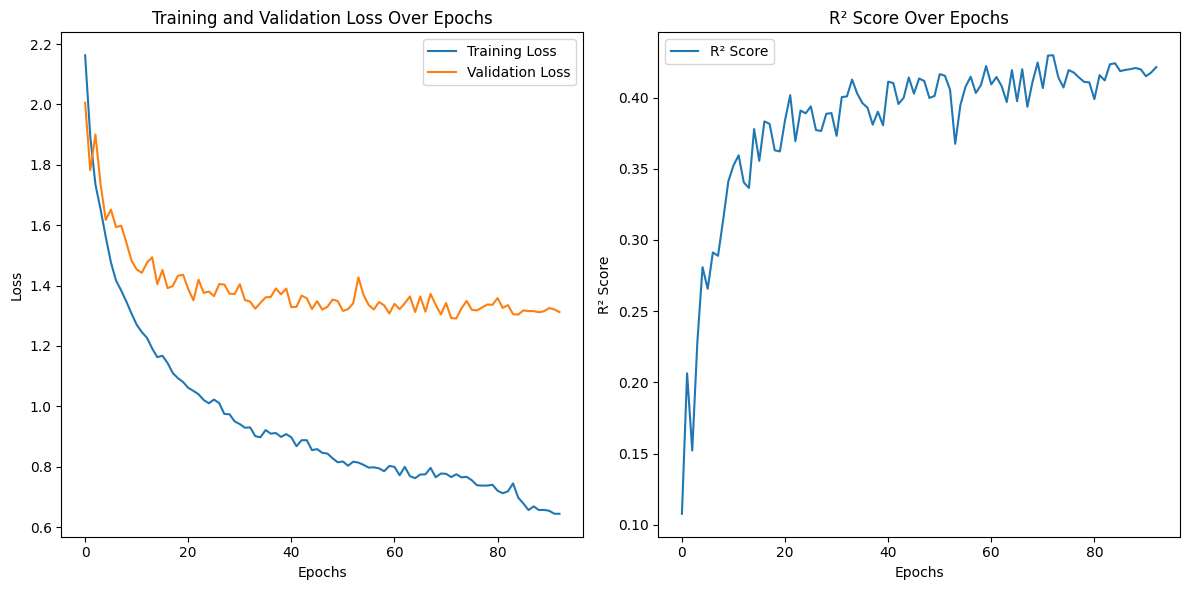

In [13]:
# Kcat prediction using Deep Learning
def Kcat_predict_DL(Ifeature, Label, sequence_new, Smiles_new, ECNumber_new, 
                    Organism_new, Substrate_new, Type_new, Test_new, 
                    smi_model, seq_model, kinetic_parameter, smi_shape, seq_shape):
    print(f'Now: SMILES model is {smi_model}  Sequence model is {seq_model} kinetic parameter is {kinetic_parameter}')
    Ifeature = np.array(Ifeature)
    Label = np.array(Label)
    
    # Device configuration (GPU or CPU)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')

    # Generate training and test indices
    train_indices = [i for i, x in enumerate(Test_new) if x == 0]
    test_indices = [i for i, x in enumerate(Test_new) if x != 0]
    print(f'Training samples: {len(train_indices)}, Test samples: {len(test_indices)}')
    
    # Prepare data
    Train_data = Ifeature[train_indices]
    Train_label = Label[train_indices]
    Test_data = Ifeature[test_indices]
    Test_label = Label[test_indices]
    
    # Convert to PyTorch tensors
    Train_data = torch.tensor(Train_data, dtype=torch.float32)
    Train_label = torch.tensor(Train_label, dtype=torch.float32).view(-1, 1)
    Test_data = torch.tensor(Test_data, dtype=torch.float32)
    Test_label = torch.tensor(Test_label, dtype=torch.float32).view(-1, 1)
    
    # Create TensorDatasets and DataLoaders
    full_train_dataset = TensorDataset(Train_data, Train_label)
    train_size = int(0.9 * len(full_train_dataset))
    val_size = len(full_train_dataset) - train_size
    train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

    batch_size = 128
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_dataset = TensorDataset(Test_data, Test_label)

    # Initialize the model
    model = DLK(smi_shape=smi_shape, seq_shape=seq_shape).to(device)

    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=10, verbose=True)
    
    # Training parameters
    num_epochs = 200
    best_val_loss = float('inf')
    patience = 20
    trigger_times = 0
    
    # Lists to store the metrics
    train_losses = []
    val_losses = []
    r2_scores = []

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        epoch_train_losses = []
        
        for batch_data, batch_labels in train_loader:
            batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)
            optimizer.zero_grad()
            outputs = model(batch_data)
            loss = criterion(outputs, batch_labels)
            loss.backward()
            optimizer.step()
            epoch_train_losses.append(loss.item())
        
        # Validation step
        model.eval()
        epoch_val_losses = []
        y_true, y_pred = [], []
        with torch.no_grad():
            for val_data, val_labels in val_loader:
                val_data, val_labels = val_data.to(device), val_labels.to(device)
                val_outputs = model(val_data)
                val_loss = criterion(val_outputs, val_labels)
                epoch_val_losses.append(val_loss.item())
                y_true.append(val_labels.cpu())
                y_pred.append(val_outputs.cpu())
        
        avg_train_loss = np.mean(epoch_train_losses)
        avg_val_loss = np.mean(epoch_val_losses)
        scheduler.step(avg_val_loss)
        
        # Calculate R² score
        y_true = torch.cat(y_true)
        y_pred = torch.cat(y_pred)
        r2 = r_squared(y_true, y_pred)
        
        # Store the metrics
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        r2_scores.append(r2)
        
        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            trigger_times = 0
            best_model_state = model.state_dict()
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print('Early stopping triggered!')
                break
        
        # Logging
        if epoch % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {avg_train_loss:.4f}, '
                  f'Val Loss: {avg_val_loss:.4f}, '
                  f'R^2: {r2:.4f}')
    
    # Load the best model
    model.load_state_dict(best_model_state)
    
    # Plot the training and validation losses
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss Over Epochs')
    
    # Plot the R² scores
    plt.subplot(1, 2, 2)
    plt.plot(r2_scores, label='R² Score')
    plt.xlabel('Epochs')
    plt.ylabel('R² Score')
    plt.legend()
    plt.title('R² Score Over Epochs')
    
    plt.tight_layout()
    plt.show()

    # Prediction on all data
    model.eval()
    Ifeature_tensor = torch.tensor(Ifeature, dtype=torch.float32).to(device)
    with torch.no_grad():
        Pre_all_label = model(Ifeature_tensor).cpu().numpy().flatten()
    
    # Save results
    res = pd.DataFrame({
        'sequence': sequence_new,
        'smiles': Smiles_new,
        'ECNumber': ECNumber_new,
        'Organism': Organism_new,
        'Substrate': Substrate_new,
        'Type': Type_new,
        'Label': Label,
        'Predict_Label': Pre_all_label,
        'Training or test': Test_new
    })
    res.to_excel(f'./DLK_{smi_model}_{seq_model}_{kinetic_parameter}.xlsx')
# Define the shapes of the SMILES and sequence inputs
smi_shape = 1024
seq_shape = 1280
# Run the Kcat prediction function
Kcat_predict_DL(feature_new, Label_new, sequence_new, Smiles_new, ECNumber_new,
                Organism_new, Substrate_new, Type_new, Test_new, smi_model, seq_model, kinetic_parameter, smi_shape, seq_shape)

### Evulation of performance on test dataset
This code segment aims to evaluate the performance of a machine learning model on a test dataset and visualize the relationship between actual and predicted values. Please refer to the materials regarding Pearson correlation coefficient, Root Mean Squared Error, and Mean Absolute Error

Processing file: ./ML_smitrans_esm2_KCAT.xlsx
Print the performance metrics for the test set: Pcc: 0.7139382916141044 RMSE: 1.0750074335825335 MAE: 0.7794864010994108 r2: 0.5083200819959485


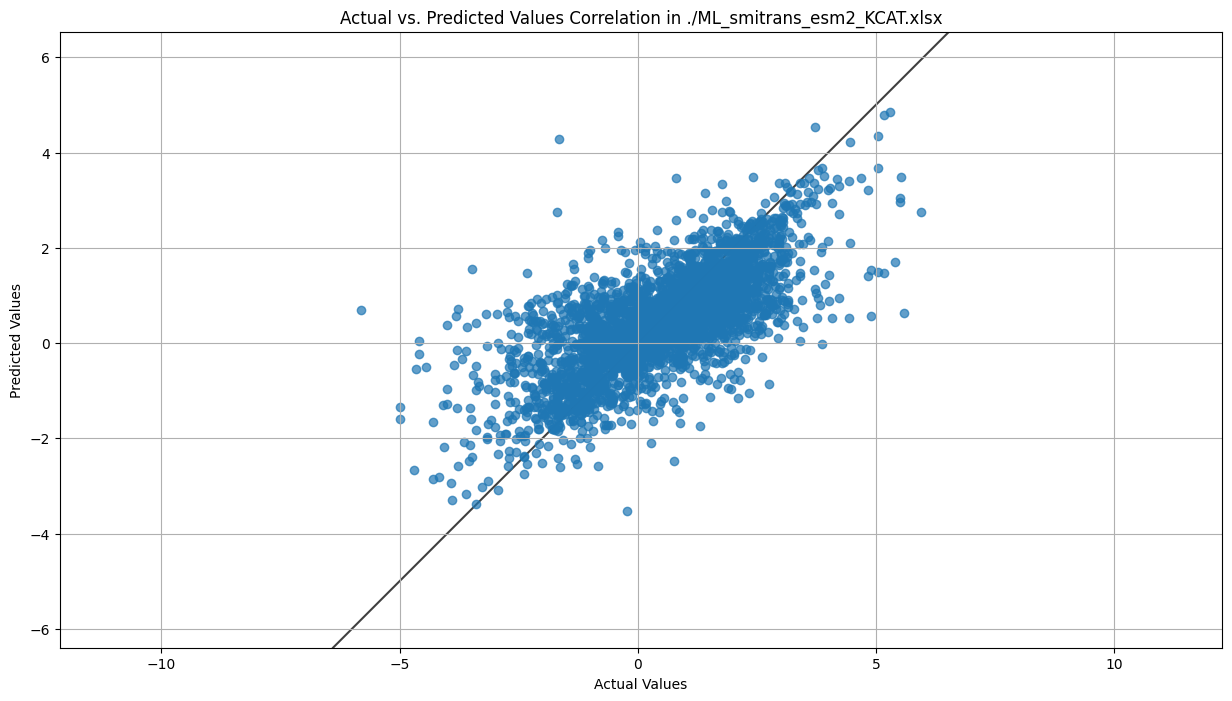

Processing file: ./DLK_smitrans_esm2_KCAT.xlsx
Print the performance metrics for the test set: Pcc: 0.6706572618384963 RMSE: 1.1477281384518598 MAE: 0.846494495807213 r2: 0.4395490699713227


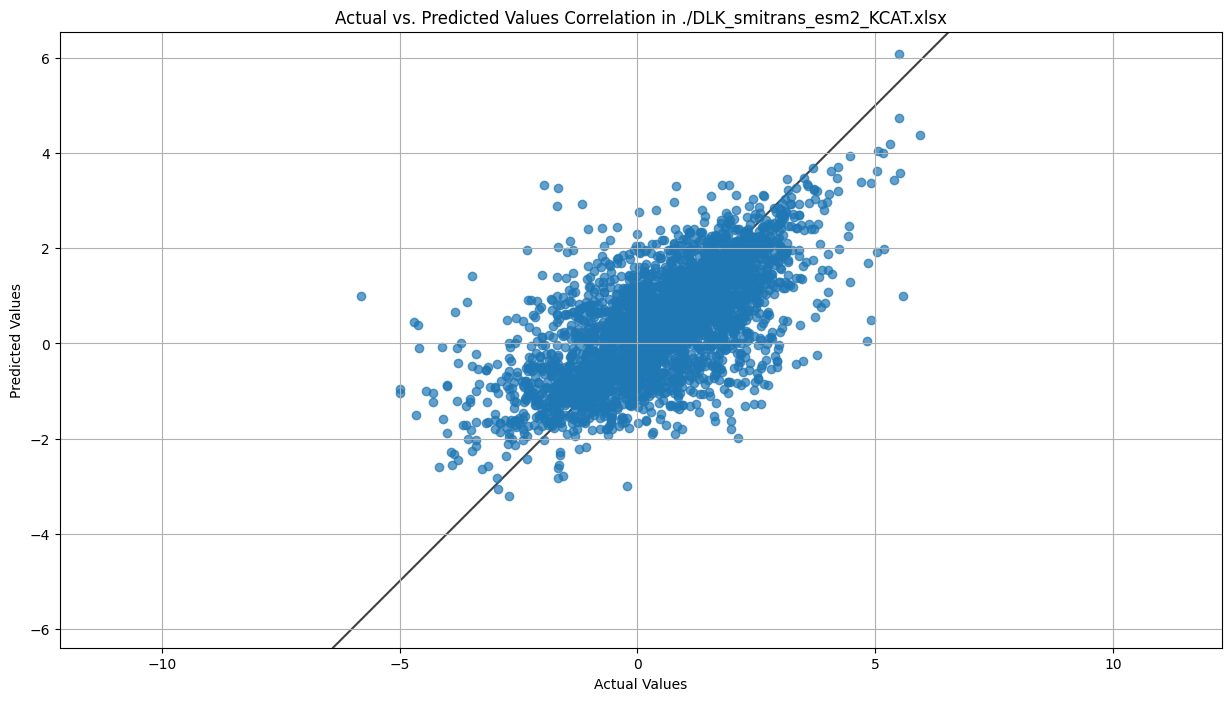

In [ ]:
import glob
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Function to calculate performance metrics on the test dataset
def test_dataset():
    # Initialize lists to hold the actual and predicted values for the test set
    Value_test = []
    Predict_Label_test = []

    # Iterate over the entire dataset and collect test set values
    for i in range(len(Training_test)):
        if Training_test[i] == 1:  # Assuming 1 indicates test set
            Value_test.append(Value[i])
            Predict_Label_test.append(Predict_Label[i])

    # Convert lists to numpy arrays for calculations
    Value_test = np.array(Value_test)
    Predict_Label_test = np.array(Predict_Label_test)

    # Calculate performance metrics
    Pcc_test = pearsonr(Value_test, Predict_Label_test)[0]  # Pearson correlation coefficient
    RMSE_test = np.sqrt(mean_squared_error(Value_test, Predict_Label_test))  # Root Mean Squared Error
    MAE_test = mean_absolute_error(Value_test, Predict_Label_test)  # Mean Absolute Error
    r2_test = r2_score(Value_test, Predict_Label_test)  # R-squared

    # Print the performance metrics for the test set
    print(f'Print the performance metrics for the test set: Pcc: {Pcc_test} RMSE: {RMSE_test} MAE: {MAE_test} r2: {r2_test}')

# Find all Excel files ending with '_KCAT.xlsx' in the current directory
files = glob.glob('./*_KCAT.xlsx')

# Process each file
for filename in files:
    # Read the Excel file and transpose the data
    res = np.array(pd.read_excel(filename, sheet_name='Sheet1')).T

    # Extract the relevant columns
    sequence = res[1]
    smiles = res[2]
    Type = res[6]
    Value = res[7]  # Actual values
    Predict_Label = res[8]  # Predicted labels
    Training_test = res[9]  # Indicator for training/test set (0 for training, 1 for test)

    # Print the filename
    print(f"Processing file: {filename}")

    # Call the test_dataset function to compute and print the performance metrics
    test_dataset()

    test_mask = (Training_test == 1)
    actual_values = Value[test_mask].astype(float)
    predicted_values = Predict_Label[test_mask].astype(float)
    # Plot the actual vs. predicted values
    plt.figure(figsize=(15, 8))
    plt.scatter(actual_values, predicted_values, alpha=0.7)
    plt.title(f'Actual vs. Predicted Values Correlation in {filename}') 
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    # Add a diagonal line
    lims = [
        np.min([plt.xlim(), plt.ylim()]),  # min of both axes
        np.max([plt.xlim(), plt.ylim()]),  # max of both axes
    ]
    plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.axis('equal')
    plt.xlim(lims)
    plt.ylim(lims)
    # Add a legend with the Pearson correlation
    corr, _ = pearsonr(actual_values, predicted_values)
    # plt.text(0.1,0.1,f'{filename}__Pearson correlation: {corr:.2f}', transform=plt.gca().transAxes)
    plt.show()

### Aditional Question ( No need to answer if you run out of time)
10. Following the above process, the functions in the 'test.py' file are used to calculate PCC, RMSE, MAE and R² of all the test set data in the data set obtained by machine learning and deep learning methods. Could you calculate PCC, RMSE, MAE and R² of all **mutant** test set data n the data set obtained by machine learning and deep learning methods?
`Hint: Take advantage of test.py`
____________________________________________________________________________________
- The followings are open questions, please search for the relevant information, and try to answer them:
11. What do you think are the strengths and weaknesses of machine learning and deep learning in this task?
____________________________________________________________________________________
12. In industrial biotechnology, how can enzyme kinetic parameters be used to optimize enzyme production or catalytic efficiency?
____________________________________________________________________________________